In [2]:
from gaia_tools import query
import gaia_tools.load as gload
from astroquery.gaia import Gaia
import matplotlib
#matplotlib.use("AGG")
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.table import Table
import pyexcel
from astropy import units as u
from astropy.coordinates import SkyCoord

from astroquery.ned import Ned
from astropy import coordinates

import sklearn
from sklearn import cluster
from astropy import units as u
from astropy.coordinates import SkyCoord
from matplotlib.patches import Circle
#from matplotlib import patches

%pylab inline

import pywt
from galpy.util import bovy_plot

Created TAP+ (v1.0.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
Populating the interactive namespace from numpy and matplotlib


In [3]:
# csv-pd set up for DBSCANN
GlobClust_Log_ra_dec = pd.read_csv('~/GlobClust_ra-dec.csv')
GlobClust_Log_r_t = GlobClust_Log_ra_dec.loc[0:0,"r_t"]
GlobClust_Log_radec = GlobClust_Log_ra_dec.loc[0:0,"RA":"DEC"]
GlobClust_Log_ID = GlobClust_Log_ra_dec.loc[0:0,"ID"]
GlobClust_Log_r_c = GlobClust_Log_ra_dec.loc[0:0,"r_c"]
GlobClust_Log_r_t = GlobClust_Log_ra_dec.loc[0:0,"r_t"]

coord_ra_dec_deg=[]
coord_ra_dec = SkyCoord(GlobClust_Log_radec.loc[:,"RA"], GlobClust_Log_radec.loc[:,"DEC"], frame='icrs')

GlobClust_Log_dec = coord_ra_dec.dec.deg
GlobClust_Log_ra = coord_ra_dec.ra.deg

In [5]:
co = coordinates.SkyCoord(ra=GlobClust_Log_ra, dec=GlobClust_Log_dec,
                           unit=(u.deg, u.deg), frame='fk4')
result_table = Ned.query_region(coord_ra_dec, radius=3.3 * u.deg, equinox='B1950.0')
print(result_table)

ReadTimeout: HTTPConnectionPool(host='ned.ipac.caltech.edu', port=80): Read timed out. (read timeout=60)

In [7]:
#CONE SEARCH
job = Gaia.launch_job_async("SELECT top 1000 gaia.ra, gaia.dec, gaia.l, gaia.b, gaia.pmra, \
gaia.pmdec, gaia.phot_g_mean_mag, gaia.phot_rp_mean_mag, gaia.phot_bp_mean_mag, \
gaia.parallax,gaia.parallax_error,gaia.a_g_val ,panstarrs1.g_mean_psf_mag, \
panstarrs1.g_mean_psf_mag_error,panstarrs1.r_mean_psf_mag,panstarrs1.r_mean_psf_mag_error, \
panstarrs1.i_mean_psf_mag,panstarrs1.i_mean_psf_mag_error FROM gaiadr2.gaia_source \
AS gaia INNER JOIN gaiadr2.panstarrs1_best_neighbour AS panstarrs1_match ON \
panstarrs1_match.source_id = gaia.source_id INNER JOIN gaiadr2.panstarrs1_original_valid \
AS panstarrs1 ON panstarrs1.obj_id = panstarrs1_match.original_ext_source_id \
WHERE 1=CONTAINS(POINT('ICRS',gaia.ra,gaia.dec),CIRCLE('ICRS',%f,%f,%f))" % \
(GlobClust_Log_ra,GlobClust_Log_dec,GlobClust_Log_r_t/60*15),dump_to_file=False)
data = job.get_results()

/usr/local/lib/python3.6/site-packages/astropy/io/votable/tree.py:1652: W27: None:3:0: W27: COOSYS deprecated in VOTable 1.2
  warn_or_raise(W27, W27, (), config, pos)

/usr/local/lib/python3.6/site-packages/astropy/io/votable/tree.py:722: W35: None:5:0: W35: 'value' attribute required for INFO elements
  warn_or_raise(W35, W35, ('value'), self._config, self._pos)

/usr/local/lib/python3.6/site-packages/astropy/io/votable/tree.py:722: W35: None:6:0: W35: 'value' attribute required for INFO elements
  warn_or_raise(W35, W35, ('value'), self._config, self._pos)

/usr/local/lib/python3.6/site-packages/astropy/io/votable/tree.py:722: W35: None:7:0: W35: 'value' attribute required for INFO elements
  warn_or_raise(W35, W35, ('value'), self._config, self._pos)

/usr/local/lib/python3.6/site-packages/astropy/io/votable/tree.py:722: W35: None:8:0: W35: 'value' attribute required for INFO elements
  warn_or_raise(W35, W35, ('value'), self._config, self._pos)

/usr/local/lib/python3.6/site-packa

In [22]:
#data
PANSTARRS_Log = pd.read_csv('~/PANSTARRS_NGC288_boxquery_full.csv')
#PANSTARRS_Log.reindex()

In [4]:
data

NameError: name 'data' is not defined

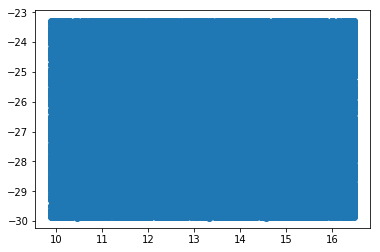

In [23]:
plt.scatter(PANSTARRS_Log['ra'], PANSTARRS_Log['dec'])
plt.show()

In [24]:
shape(PANSTARRS_Log)

(83681, 23)

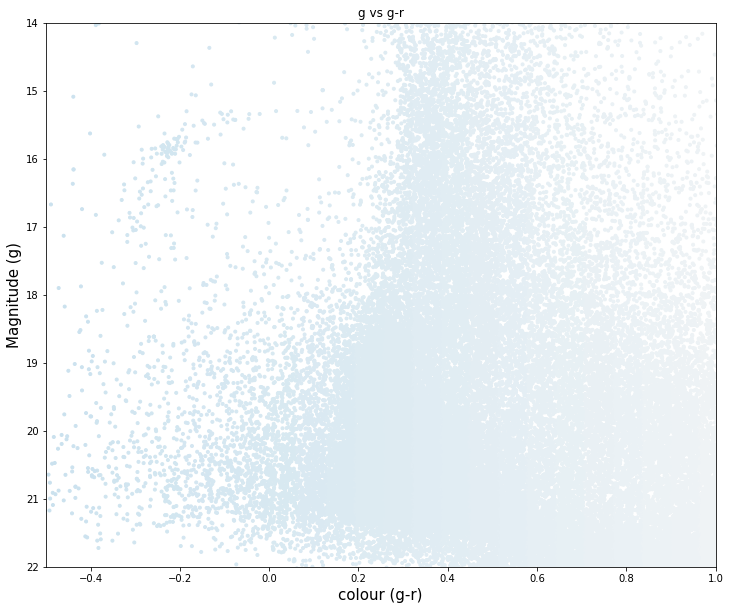

In [25]:
PS_colour = PANSTARRS_Log['g_mean_psf_mag']-PANSTARRS_Log['r_mean_psf_mag']
PS_Mag = PANSTARRS_Log['g_mean_psf_mag']-5*((np.log10(8900)) - 1)

fig=plt.figure(figsize=(12,10))
plt.scatter(PS_colour, PANSTARRS_Log['g_mean_psf_mag'], marker='.', c=PS_colour, cmap='RdBu_r')
plt.gca().invert_yaxis()
plt.title('g vs g-r')
plt.xlabel('colour (g-r)', fontsize=15)
plt.ylabel('Magnitude (g)', fontsize=15)
#plt.legend()
#plt.gca().set_ylim([20.7, 18.7])
#plt.gca().set_xlim([0.15,0.52])
plt.gca().set_ylim([22, 14])
plt.gca().set_xlim([-0.5,1])
plt.show()

#M_uplim=20.7-5*((log10(d_pc[5])) - 1)
#M_dlim=18.7-5*((log10(d_pc[5])) - 1)


In [33]:
#GlobClust_Log_2 = pd.read_csv('~/out_NGC 288_full_12-rt_ra_dec.csv')
GlobClust_Log_2 = pd.read_csv('~/PANSTARRS_NGC288_boxquery_full.csv')
GlobClust_Log_pmra = GlobClust_Log_2.loc[:,"pmra"]
GlobClust_Log_pmdec = GlobClust_Log_2.loc[:,"pmdec"]
GlobClust_Log_pmra_error = GlobClust_Log_2.loc[:,"pmra_error"]
GlobClust_Log_pmdec_error = GlobClust_Log_2.loc[:,"pmdec_error"]
GlobClust_Log_ra = GlobClust_Log_2.loc[:,"ra"]
GlobClust_Log_dec = GlobClust_Log_2.loc[:,"dec"]

GlobClust_Log_g = GlobClust_Log_2.loc[:,"phot_g_mean_mag"]
GlobClust_Log_rp = GlobClust_Log_2.loc[:,"phot_rp_mean_mag"]
GlobClust_Log_bp = GlobClust_Log_2.loc[:,"phot_bp_mean_mag"]
GlobClust_Log_rpbp = GlobClust_Log_bp - GlobClust_Log_rp
GlobClust_Log_ra_out = GlobClust_Log_2.loc[:,"ra"]
GlobClust_Log_dec_out = GlobClust_Log_2.loc[:,"dec"]
GlobClust_Log_pmdec_out = GlobClust_Log_2.loc[:,"pmdec"]
GlobClust_Log_pmra_out = GlobClust_Log_2.loc[:,"pmra"]

GlobClust_Log_vpu = GlobClust_Log_2.loc[:,"visibility_periods_used"]
GlobClust_Log_aen = GlobClust_Log_2.loc[:,"astrometric_excess_noise"]

#GlobClust_Log_pmra = GlobClust_Log_pmra.as_matrix()
#GlobClust_Log_pmdec = GlobClust_Log_pmdec.as_matrix()
#GlobClust_Log_ra = GlobClust_Log_ra.as_matrix()
#GlobClust_Log_dec = GlobClust_Log_dec.as_matrix()

GlobClust_Log_parallax_out = GlobClust_Log_2.loc[:,"parallax"]
GlobClust_Log_parallaxerror_out = GlobClust_Log_2.loc[:,"parallax_error"]
GlobClust_Log_parallaxe_out = GlobClust_Log_2.loc[:,"parallax":"parallax_error"]

# DBSCANN - parallax before scan
GlobClust_Log_parallaxover_out = GlobClust_Log_parallaxerror_out/GlobClust_Log_parallax_out

#parallax_indx = (GC_parallaxover>0.20) | ((1/GC_parallax>5.)*(GC_parallaxover<0.20))
parallax_indx=((1/GlobClust_Log_parallax_out<5.)*(GlobClust_Log_parallaxover_out<0.10))
parallax_indx=[not i for i in parallax_indx]

Clust_Edge = GlobClust_Log_r_c[0]
print(Clust_Edge)
d_pc=8900

#M=m-5(log(d)-1)
GlobClust_Log_M = GlobClust_Log_g-5*((np.log10(d_pc)) - 1)

indx = (np.sqrt((np.fabs(GlobClust_Log_ra_out-coord_ra_dec.ra.deg)**2+np.fabs(GlobClust_Log_dec_out-coord_ra_dec.de\
c.deg)**2))<Clust_Edge/60)

/home/kaderali/.local/lib/python3.6/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))

1.35


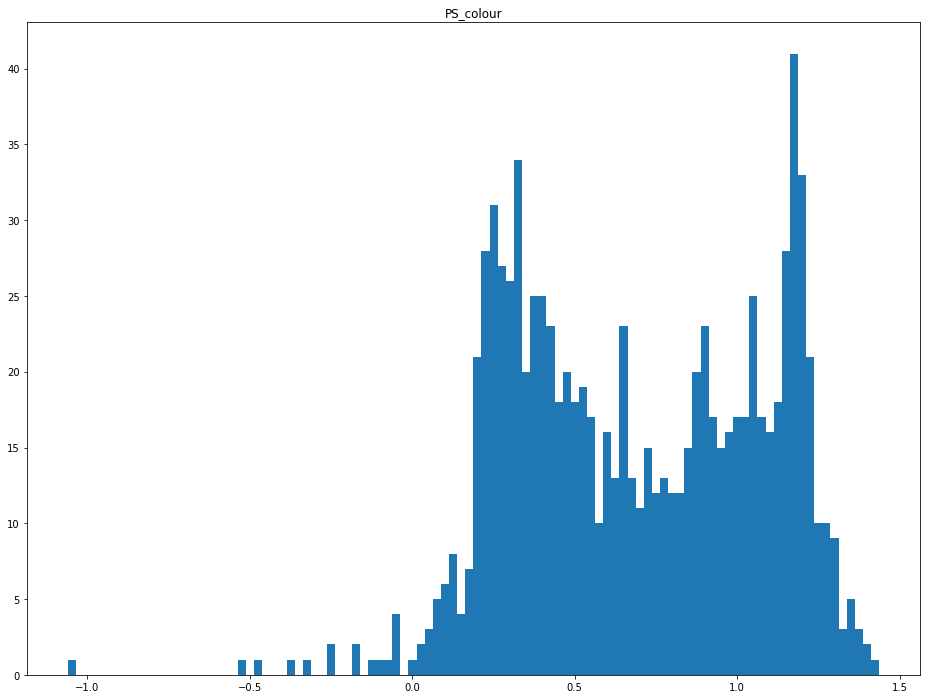

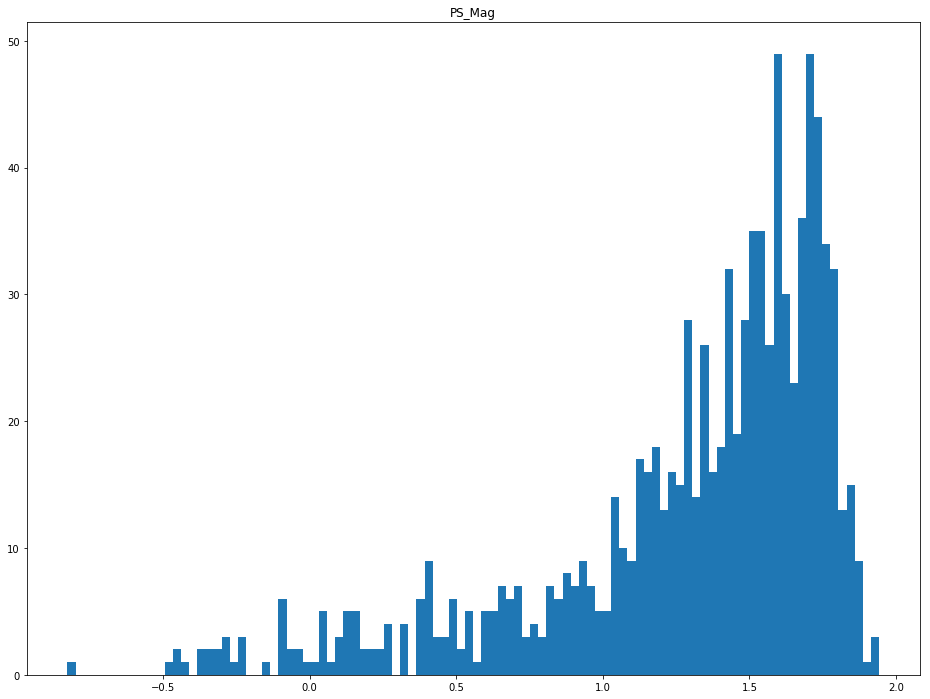

In [51]:
data_pd=data.to_pandas()

PS_colour_pd = data_pd.loc[:,"g_mean_psf_mag"] -  data_pd.loc[:,"r_mean_psf_mag"]
PS_Mag_pd = data_pd.loc[:,"g_mean_psf_mag"] -5*((np.log10(d_pc)) - 1)

fig=plt.figure(figsize=(16,12))
plt.hist(PS_colour_pd.dropna(), bins=100)#, range=[-1.5,4.5])
plt.title('PS_colour')

fig=plt.figure(figsize=(16,12))
plt.hist(PS_Mag_pd.dropna()/4, bins=100)#, range=[-1.5,4.5])
plt.title('PS_Mag')

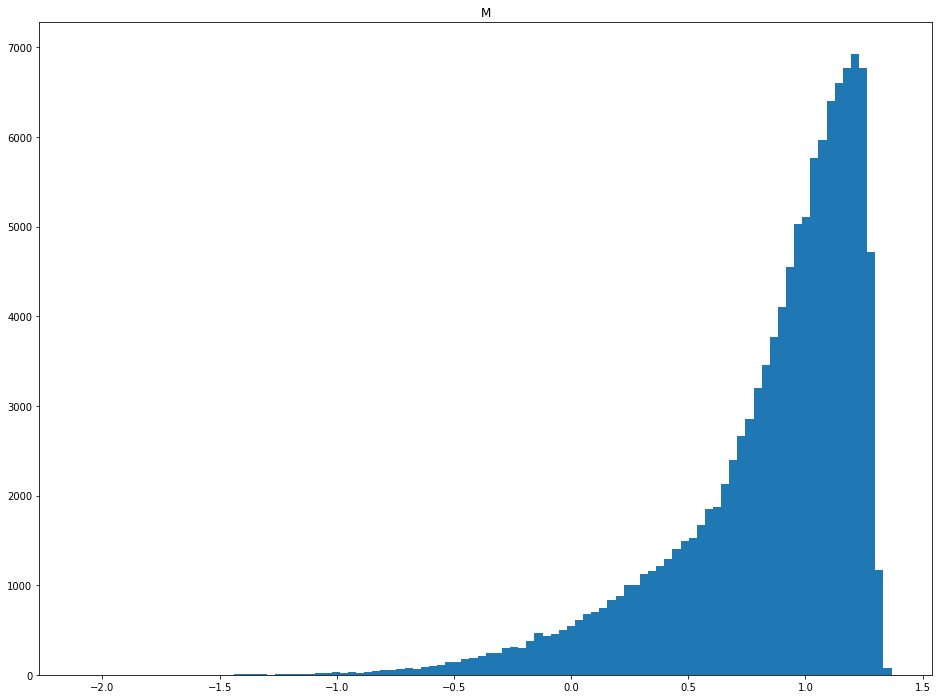

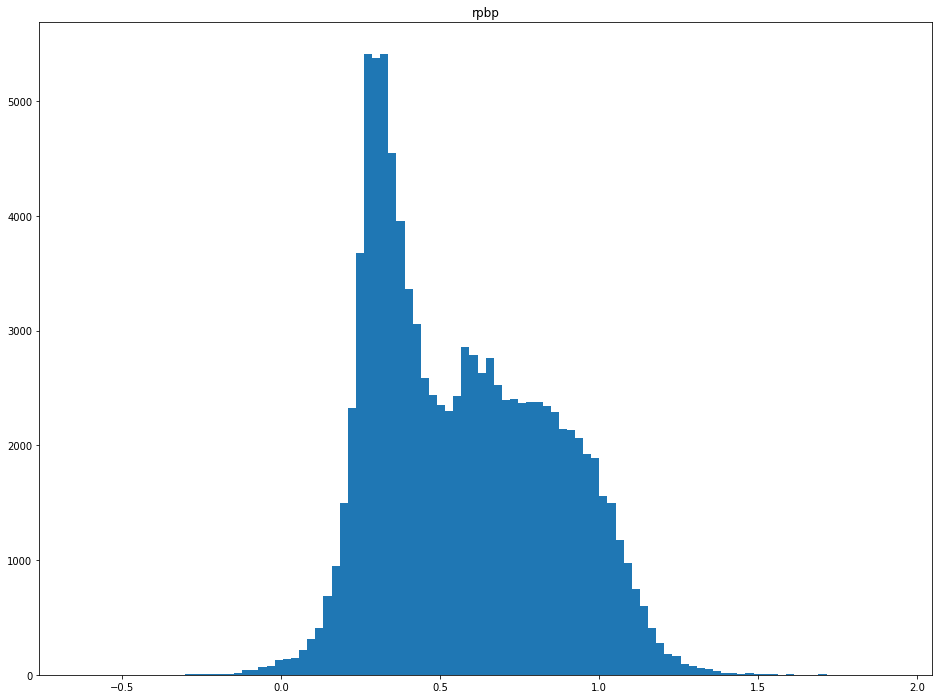

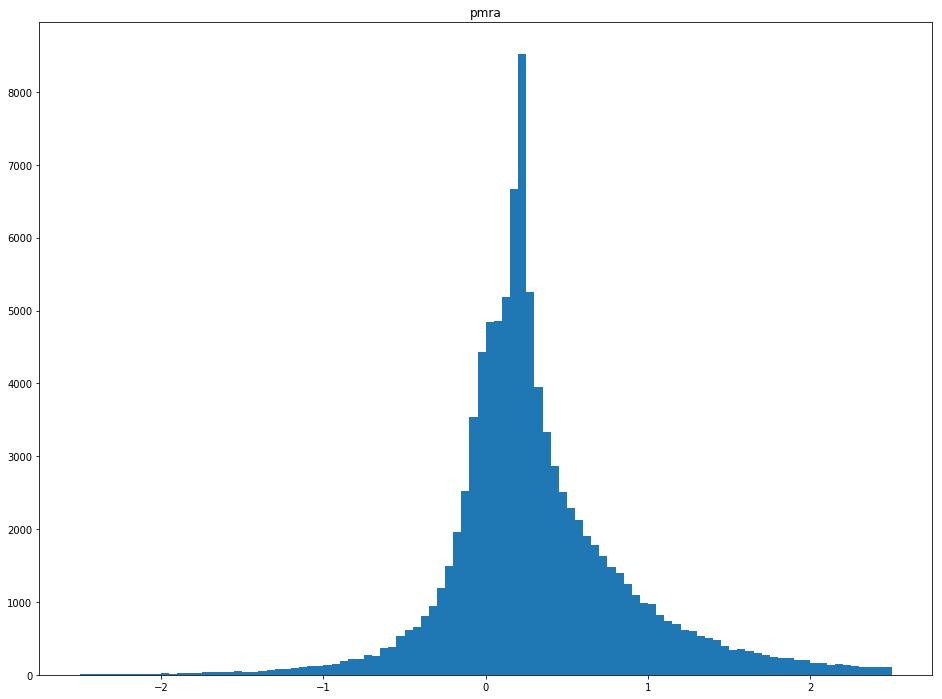

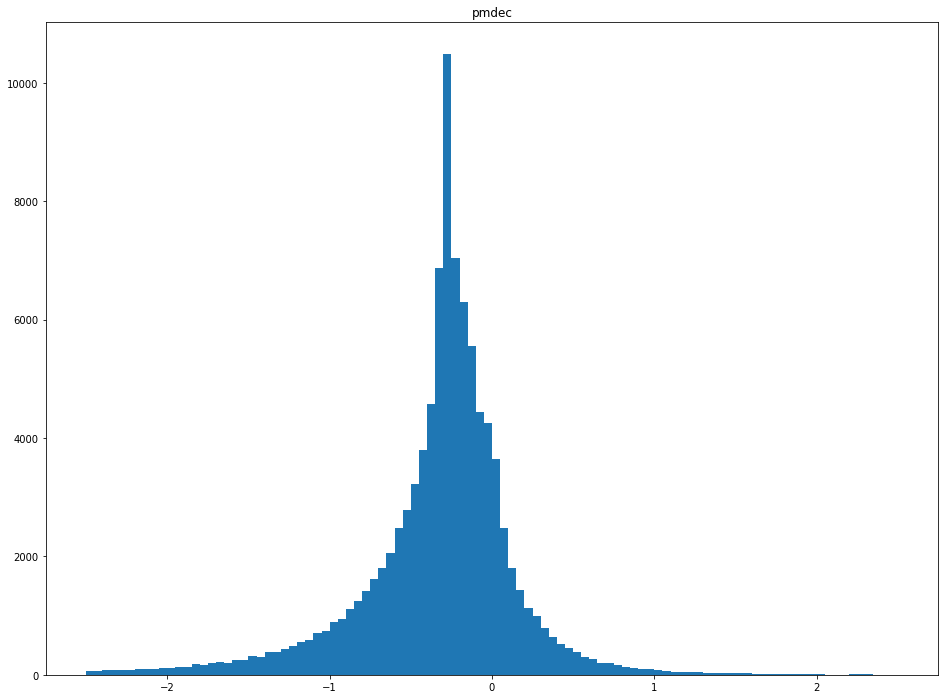

In [19]:
fig=plt.figure(figsize=(16,12))
plt.hist(GlobClust_Log_M/5, bins=100)#, range=[-1.5,4.5])
plt.title('M')

fig=plt.figure(figsize=(16,12))
plt.hist(GlobClust_Log_rpbp.dropna()/2.5, bins=100)#, range=[0.1,1.3])
plt.title('rpbp')

fig=plt.figure(figsize=(16,12))
plt.hist(GlobClust_Log_pmra.dropna()/20, bins=100, range=[-2.5,2.5])
plt.title('pmra')

fig=plt.figure(figsize=(16,12))
plt.hist(GlobClust_Log_pmdec.dropna()/20, bins=100, range=[-2.5,2.5])
plt.title('pmdec')

plt.show()

In [8]:
print(shape(GlobClust_Log_pmra[parallax_indx]), shape(PS_colour[PS_CMD_indx]))

NameError: name 'PS_CMD_indx' is not defined

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """

/home/kaderali/.local/lib/python3.6/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  unsupported[op_str]))

(8797, 4)
[-1 -1 -1 ... -1 -1 -1]
(8797,)
Estimated number of Subgroups: 1


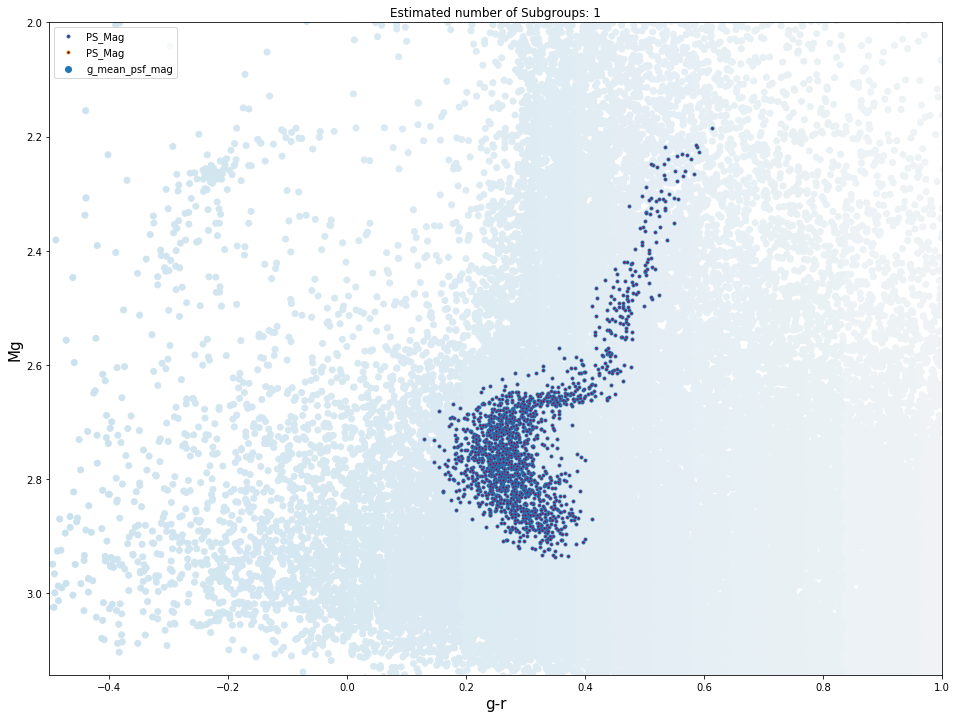

In [115]:
# DBSCAN - with parallax criteria
DB_Params =[]
DB_Params=np.transpose(DB_Params)

PS_CMD_indx = (14 < PANSTARRS_Log['g_mean_psf_mag'].as_matrix()) & (PANSTARRS_Log['g_mean_psf_mag'].as_matrix() < 22) & \
                (-0.5 < PS_colour.as_matrix()) & (PS_colour.as_matrix() < 1)
    
pm_indx=(GlobClust_Log_pmra_error[parallax_indx]/np.fabs(GlobClust_Log_pmra[parallax_indx]) < 0.20) * \
        (GlobClust_Log_pmdec_error[parallax_indx]/np.fabs(GlobClust_Log_pmdec[parallax_indx]) < 0.20) *\
        (GlobClust_Log_vpu[parallax_indx] > 8) * (GlobClust_Log_aen[parallax_indx] == 0)

DF={#'M': GlobClust_Log_M[parallax_indx]/5, 'rpbp': GlobClust_Log_rpbp[parallax_indx]/2.5, 
    'pmra': GlobClust_Log_pmra[parallax_indx][pm_indx]/10, 'pmdec': GlobClust_Log_pmdec[parallax_indx][pm_indx]/10,
   'PS_colour': PS_colour[PS_CMD_indx], 'PS_Mag': PANSTARRS_Log['g_mean_psf_mag'][PS_CMD_indx]/7}

DB_Params = pd.DataFrame(data=DF)
DB_Params=DB_Params.dropna()

print(shape(DB_Params))

db=sklearn.cluster.DBSCAN(eps=0.045, min_samples=12, metric='euclidean', metric_params=None, algorithm='auto', 
                      leaf_size=30, p=None, n_jobs=1).fit(DB_Params) #original eps=0.1625

print(db.labels_)
print(shape(db.labels_))

fig=plt.figure(figsize=(16,12))
#plt.scatter(GlobClust_Log_rpbp/2.5, GlobClust_Log_M/5, c=GlobClust_Log_rpbp/2.5, cmap='RdBu_r')
plt.scatter(PS_colour, PANSTARRS_Log['g_mean_psf_mag']/7, c=PS_colour, cmap='RdBu_r')
#plt.scatter(db,DB_Params)
#plt.show()

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of Subgroups: %d' % n_clusters_)

x_param3=[]
y_param3=[]

x_param4=[]
y_param4=[]

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    
    #NOISE
    #xy = DB_Params[class_member_mask & ~core_samples_mask]
    #plt.plot(xy.loc[:, "PS_colour"], xy.loc[:, "PS_Mag"], '.', markerfacecolor=tuple(col), zorder=1,
    #         markeredgecolor='k', markersize=6)
    
    #CLEANED DATA
    xy = DB_Params[class_member_mask & core_samples_mask]
    
    #plt.plot(xy.loc[:, "rpbp"], xy.loc[:, "M"], 'o', markerfacecolor=tuple(col),
    #         markeredgecolor='k', markersize=14)
    
    #x_param3.append(xy.loc[:, "rpbp"]*2.5)
    #y_param3.append(xy.loc[:, "M"]*5)
    
    plt.plot(xy.loc[:, "PS_colour"], xy.loc[:, "PS_Mag"], '.', markerfacecolor=tuple(col), zorder=2)
#             markeredgecolor='k', markersize=14)
    
    x_param3.append(xy.loc[:, "PS_colour"])
    y_param3.append(xy.loc[:, "PS_Mag"]*7)

    #x_param4.append(xy.loc[:, "pmra"]*0.35)
    #y_param4.append(xy.loc[:, "pmdec"]*0.3)
    
    #x_param5.append(xy.loc[:, "ra"]*0.35)
    #y_param5.append(xy.loc[:, "dec"]*0.3)

plt.gca().invert_yaxis()
plt.title('Estimated number of Subgroups: %d' % n_clusters_)
#cb=plt.colorbar()
#cb.ax.tick_params(labelsize=15)
plt.xlabel('g-r', fontsize=15)
plt.ylabel('Mg', fontsize=15)
plt.gca().set_ylim([22/7, 14/7])
plt.gca().set_xlim([-0.5,1])
plt.legend()
plt.show()
#fig.savefig('GC_DBSCAN'+ GlobClust_Log_ID[0] +'eps0p165-mins10_coreCMD-fullsetiponfullcmd.png')

(1715, 1)


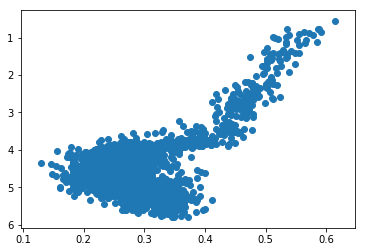


 pmra    4.392031
dtype: float64 


 pmdec   -5.678358
dtype: float64


In [116]:
x_out3 = pd.DataFrame(x_param3)#, index=None)#, mangle_dupe_cols=True)
#x_out3.reset_index()
x_out3 = x_out3.transpose() 
x_out3 = x_out3.loc[:,~x_out3.columns.duplicated()]
#x_out3 = x_out3["rpbp"].as_matrix()
x_out3

y_out3 = pd.DataFrame(y_param3)#, index=None)#, mangle_dupe_cols=True)
#y_out3.reset_index()
y_out3 = y_out3.transpose() 
y_out3 = y_out3.loc[:,~y_out3.columns.duplicated()]
#y_out3 = y_out3["M"].as_matrix()
print(shape(y_out3))

GC_ra = pd.DataFrame({'ra':GlobClust_Log_ra})
GC_dec = pd.DataFrame({'dec':GlobClust_Log_dec})
GC_pmra = pd.DataFrame({'pmra':GlobClust_Log_pmra})
GC_pmdec = pd.DataFrame({'pmdec':GlobClust_Log_pmdec})

ra_DB = GC_ra.reindex(x_out3.index)
dec_DB = GC_dec.reindex(y_out3.index)
pmra_DB = GC_pmra.reindex(x_out3.index)
pmdec_DB = GC_pmdec.reindex(y_out3.index)
M_DB = GlobClust_Log_M.reindex(y_out3.index)
rpbp_DB = GlobClust_Log_rpbp.reindex(y_out3.index)

PS_g_DB = PS_Mag.reindex(y_out3.index)
PS_M_DB = PANSTARRS_Log['g_mean_psf_mag'].reindex(y_out3.index)-5*((np.log10(d_pc)) - 1)
PS_colour_DB = PS_colour.reindex(x_out3.index)

pmra_DB_norm = (pmra_DB-pmra_DB.mean())#/(pmra_DB.mean())
pmdec_DB_norm = (pmdec_DB-pmdec_DB.mean())#/(pmdec_DB.mean())

PS_colour_DB = PS_colour.reindex(y_out3.index)
PS_Mag_DB = PS_Mag.reindex(x_out3.index)

plt.scatter(PS_colour_DB, PS_Mag_DB)
plt.gca().invert_yaxis()
plt.show()

print('\n', pmra_DB.mean(), '\n')
print('\n', pmdec_DB.mean())

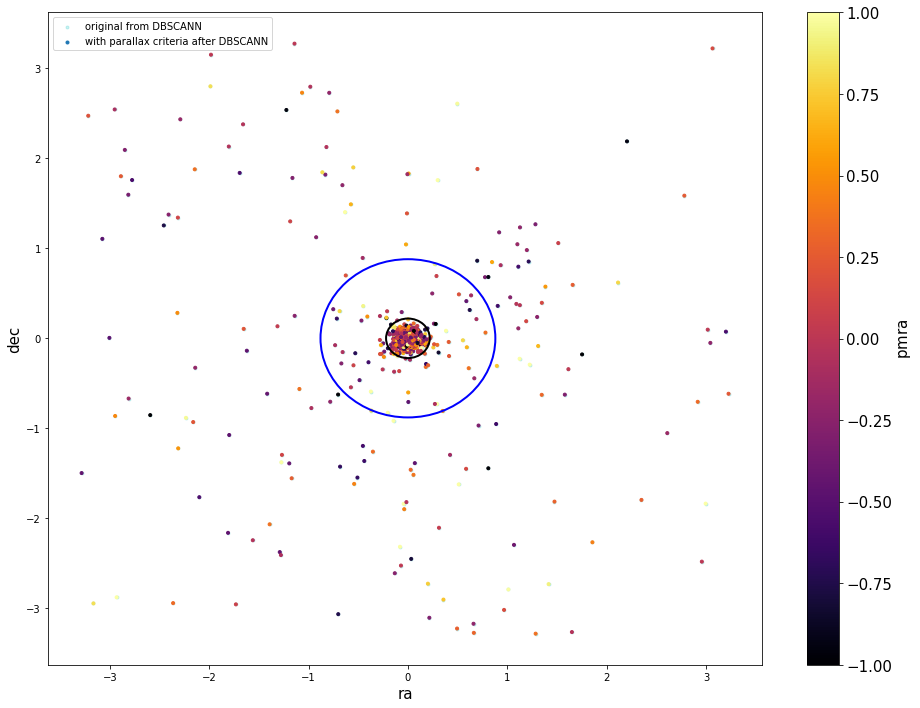

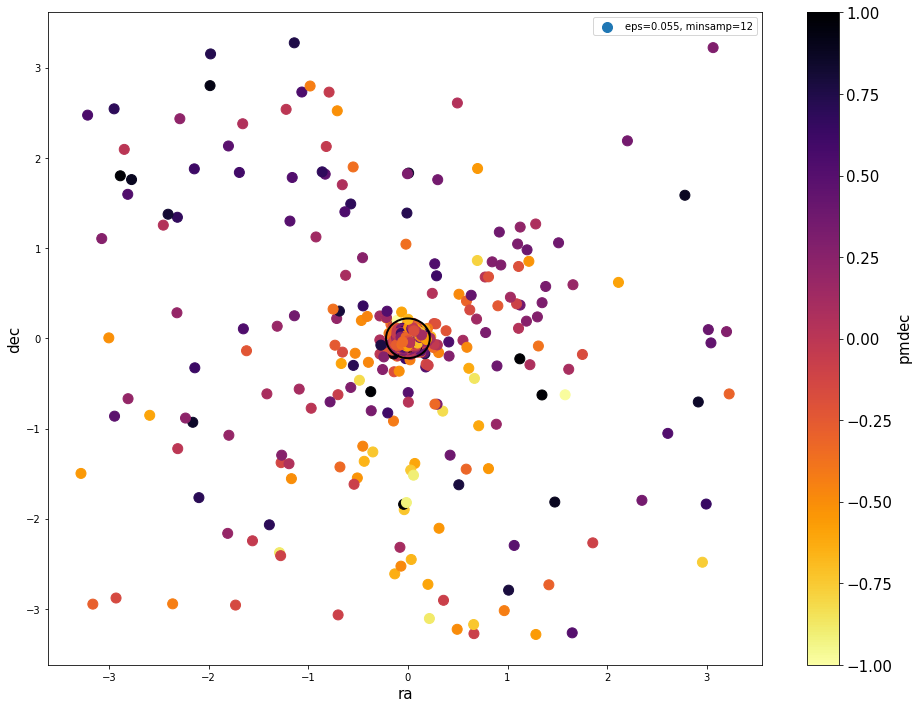

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:48: UserWarning: Boolean Series key will be reindexed to match DataFrame index.



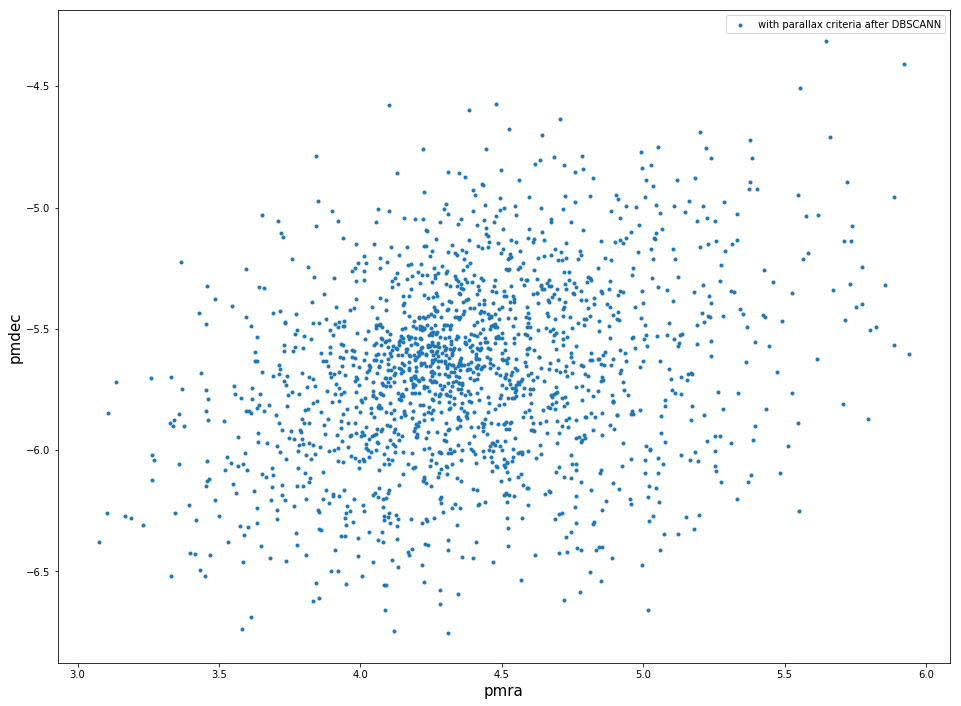

In [117]:
fig = plt.figure(figsize=(16,12))
ax = plt.gca()
plt.scatter(ra_DB-coord_ra_dec.ra.deg, dec_DB-coord_ra_dec.dec.deg, c='c', alpha=0.2,marker ='.',label='original from DBSCANN' )
plt.scatter(ra_DB-coord_ra_dec.ra.deg, dec_DB-coord_ra_dec.dec.deg, c=pmra_DB_norm, cmap='inferno',marker ='.',
            vmin=-1, vmax=1, label='with parallax criteria after DBSCANN')
circle = plt.Circle((0, 0), GlobClust_Log_r_t[0]/60, color='k', fill=False, lw=2)
circle2 = plt.Circle((0, 0), 4*GlobClust_Log_r_t[0]/60, color='b', fill=False, lw=2)
ax.add_artist(circle)
ax.add_artist(circle2)
#plt.title('eps=0.031, min samps=18')
cb=plt.colorbar()
cb.ax.tick_params(labelsize=15)
cb.set_label(r'$\mathrm{pmra}$',fontsize=15)
plt.xlabel('ra', fontsize=15)
plt.ylabel('dec', fontsize=15)
#plt.gca().set_ylim([4*GlobClust_Log_r_t.as_matrix()/60, -4*GlobClust_Log_r_t.as_matrix()/60])
#plt.gca().set_xlim([4*GlobClust_Log_r_t.as_matrix()/60, -4*GlobClust_Log_r_t.as_matrix()/60])
#plt.gca().set_ylim([2,-2])
#plt.gca().set_xlim([-2, 2])
plt.legend()
plt.show()

fig = plt.figure(figsize=(16,12))
ax = plt.gca()
#plt.scatter(ra_DB-coord_ra_dec.ra.deg, dec_DB-coord_ra_dec.dec.deg, c='c', alpha=0.2, label='original from DBSCANN' )
plt.scatter(ra_DB-coord_ra_dec.ra.deg, dec_DB-coord_ra_dec.dec.deg, c=pmdec_DB_norm, cmap='inferno_r',marker ='o', s=100,
            vmin=-1, vmax=1, label='eps=0.055, minsamp=12')
circle = plt.Circle((0, 0), GlobClust_Log_r_t[0]/60, color='k', fill=False, lw=2)
circle2 = plt.Circle((0, 0), 4*GlobClust_Log_r_t[0]/60, color='b', fill=False, lw=2)
ax.add_artist(circle)
#ax.add_artist(circle2)
#plt.title('eps=0.031, min samps=18')
cb=plt.colorbar()
cb.ax.tick_params(labelsize=15)
cb.set_label(r'$\mathrm{pmdec}$',fontsize=15)
plt.xlabel('ra', fontsize=15)
plt.ylabel('dec', fontsize=15)
#plt.gca().set_ylim([4*GlobClust_Log_r_t.as_matrix()/60, -4*GlobClust_Log_r_t.as_matrix()/60])
#plt.gca().set_xlim([4*GlobClust_Log_r_t.as_matrix()/60, -4*GlobClust_Log_r_t.as_matrix()/60])
#plt.gca().set_ylim([2,-2])
#plt.gca().set_xlim([-2, 2])
plt.legend()
plt.show()

fig = plt.figure(figsize=(16,12))
ax = plt.gca()
#plt.scatter(ra_DB-coord_ra_dec.ra.deg, dec_DB-coord_ra_dec.dec.deg, c='c', alpha=0.2, label='original from DBSCANN' )
plt.scatter(pmra_DB[pm_indx], pmdec_DB[pm_indx],marker ='.',label='with parallax criteria after DBSCANN')
circle = plt.Circle((0, 0), GlobClust_Log_r_t[0]/60, color='k', fill=False, lw=2)
circle2 = plt.Circle((0, 0), 4*GlobClust_Log_r_t[0]/60, color='b', fill=False, lw=2)
#ax.add_artist(circle)
#ax.add_artist(circle2)
#plt.title('eps=0.031, min samps=18')
#cb=plt.colorbar()
#cb.ax.tick_params(labelsize=15)
#cb.set_label(r'$\mathrm{pmdec}$',fontsize=15)
plt.xlabel('pmra', fontsize=15)
plt.ylabel('pmdec', fontsize=15)
#plt.gca().set_ylim([4*GlobClust_Log_r_t.as_matrix()/60, -4*GlobClust_Log_r_t.as_matrix()/60])
#plt.gca().set_xlim([4*GlobClust_Log_r_t.as_matrix()/60, -4*GlobClust_Log_r_t.as_matrix()/60])
#plt.gca().set_ylim([2,-2])
#plt.gca().set_xlim([-2, 2])
plt.legend()
plt.show()

In [25]:
print(shape(PS_colour_DB), shape(PS_M_DB))
print(shape(GlobClust_Log_M), shape(M_DB), shape(y_out3))
M_DB

(2081,) (2081,)
(118965,) (2081,) (2081, 1)


1334      5.193310
1693      4.061857
2126      2.922081
3254      4.749535
4222      5.845783
5462      4.214579
5827      5.400084
6238      4.114176
6689      4.935326
7244      4.589930
7416      4.083267
7531      3.033884
7832      5.049679
7948      5.598137
8044      3.365627
9054      4.768885
9638      4.729143
9665      5.594286
11541     4.722635
11583     4.472822
12651     3.524008
12737     5.494833
12771     4.233856
12772     5.399128
12873     3.657578
12918     5.559822
12921     3.918915
12973     3.982350
12994     5.255097
13224     5.156216
            ...   
95296     4.388216
95472     5.069206
96235     4.667135
97237     4.312559
97459     5.566044
97551     4.810207
97771     4.207993
97878     5.372997
98682     5.620825
99695     5.765669
99732     3.940073
99772     4.614166
99988     4.617003
101039    5.331871
101296    5.106924
103067    5.088310
103904    5.108084
105087    5.620501
105516    4.342291
106488    4.762554
108280    5.111572
109536    5.

In [26]:
import time

t0 = time.time()

M_f = []
colour_f = []

M_i = GlobClust_Log_M.as_matrix()
M_k = PS_M_DB.as_matrix()
rpbp_i = GlobClust_Log_rpbp.as_matrix()
colour_k = PS_colour_DB.as_matrix()

Cluster = np.zeros(len(M_k), dtype='bool')

for i in range(1, len(M_i)):
    for k in range(0, len(M_k)):
        if M_k[k] == M_i[i] and colour_k[k] == rpbp_i[i]:
            M_f.append(M_k[k])
            colour_f.append(colour_k[k])
            Cluster[i]=True
            break
            
t1 = time.time()
total = t1-t0
print(total)
print(shape(M_f))
#print(Cluster)
print(np.shape(Cluster))
print(np.sum(Cluster))


72.46277713775635
(0,)
(2081,)
0


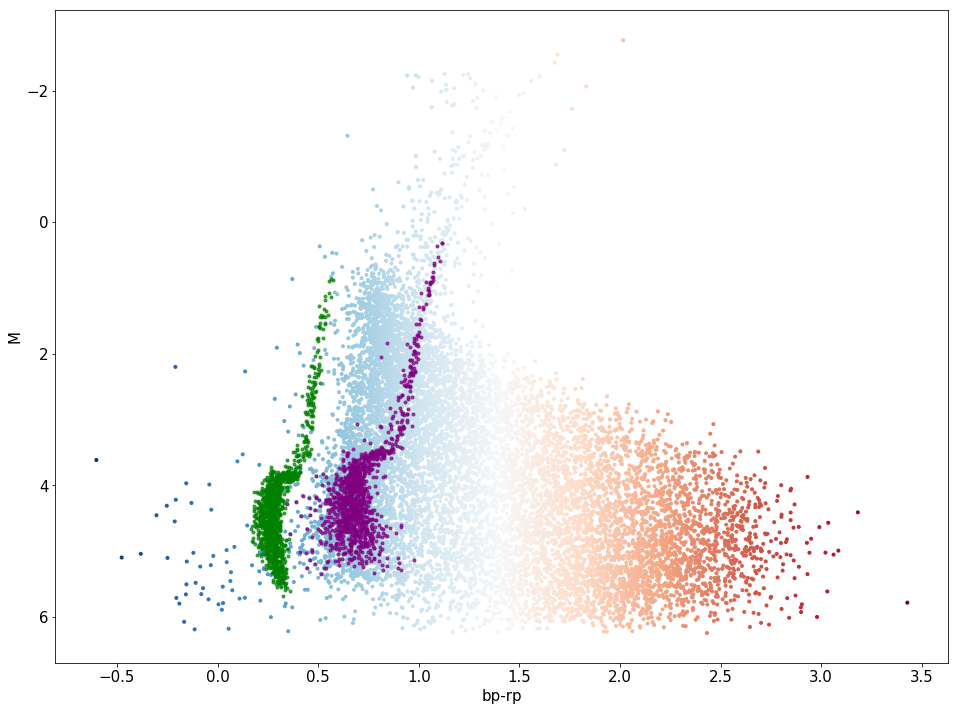

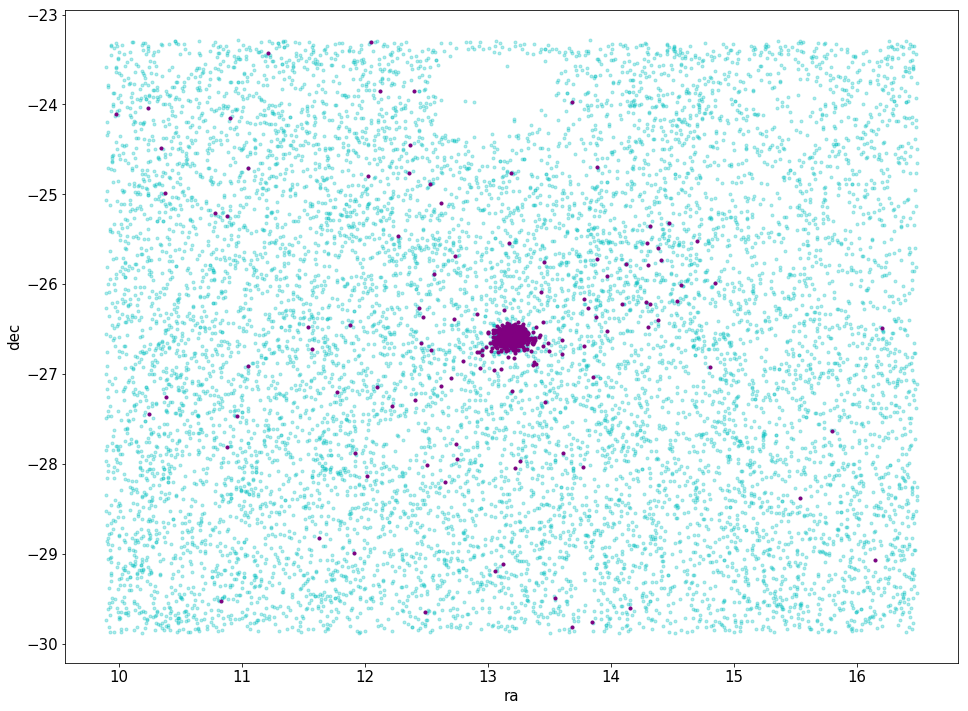

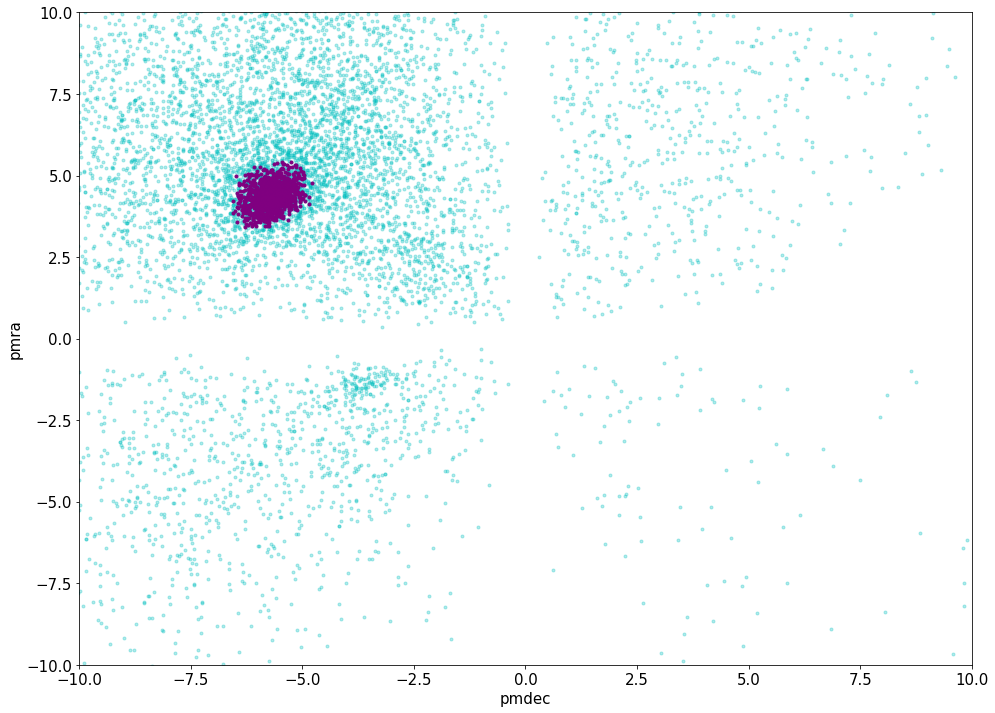

In [86]:
fig=plt.figure(figsize=(16,12))
plt.scatter(x=GlobClust_Log_rpbp[parallax_indx][pm_indx], y=GlobClust_Log_M[parallax_indx][pm_indx], c=GlobClust_Log_rpbp[parallax_indx][pm_indx], cmap='RdBu_r', marker='.')
plt.scatter(x=rpbp_DB, y=M_DB, c='purple', alpha=0.7, marker='.')
plt.scatter(x=PS_colour_DB, y=PS_M_DB, c='g', alpha=0.7, marker='.')
#plt.scatter(x=rpbp_ic, y=M_ic, c='g', alpha=0.2, marker='.')
plt.xlabel('bp-rp', fontsize=15)
plt.ylabel('M', fontsize=15)
#plt.gca().invert_yaxis()
#plt.title('CMD of ' + GC_IDs[i], fontsize=15)
#cb=plt.colorbar()
#cb.ax.tick_params(labelsize=15)
#cb.set_label(r'$\mathrm{pmdec}$',fontsize=15)
plt.gca().tick_params(labelsize=15)
plt.gca().invert_yaxis()
plt.show()

fig=plt.figure(figsize=(16,12))
plt.scatter(x=GlobClust_Log_ra_out[parallax_indx][pm_indx], y=GlobClust_Log_dec_out[parallax_indx][pm_indx], c='c', alpha=0.3, marker='.')
#plt.scatter(x=rpbp_final2, y=M_final2, c='purple', alpha=0.7)
plt.scatter(x=ra_DB, y=dec_DB, c='purple', marker='.')#, alpha=0.2)
plt.xlabel('ra', fontsize=15)
plt.ylabel('dec', fontsize=15)
#plt.gca().invert_yaxis()
#plt.title('CMD of ' + GC_IDs[i], fontsize=15)
#cb=plt.colorbar()
#cb.ax.tick_params(labelsize=15)
#cb.set_label(r'$\mathrm{pmdec}$',fontsize=15)
plt.gca().tick_params(labelsize=15)
plt.show()

fig=plt.figure(figsize=(16,12))
#plt.hexbin(GlobClust_Log_pmdec_out, GlobClust_Log_pmra_out, extent=[-10,10, -10,10], bins='log',gridsize=200)
plt.scatter(x=GlobClust_Log_pmdec_out[parallax_indx][pm_indx], y=GlobClust_Log_pmra_out[parallax_indx][pm_indx], c='c', alpha=0.3, marker='.')
#plt.scatter(x=rpbp_final2, y=M_final2, c='purple', alpha=0.7)
plt.scatter(x=pmdec_DB, y=pmra_DB, c='purple', marker='.')#, alpha=0.2)
plt.ylabel('pmra', fontsize=15)
plt.xlabel('pmdec', fontsize=15)
#plt.gca().invert_yaxis()
#plt.title('CMD of ' + GC_IDs[i], fontsize=15)
#cb=plt.colorbar()
#cb.ax.tick_params(labelsize=15)
#cb.set_label(r'$\mathrm{pmdec}$',fontsize=15)
plt.gca().tick_params(labelsize=15)
plt.gca().set_ylim([-10,10])
plt.gca().set_xlim([-10,10])
#plt.gca().set_ylim([3.5,4.6])
#plt.gca().set_xlim([-7.5,-3.5])
plt.show()

(123, 1)
(123, 1)
[0.    0.006 0.012 0.018 0.024 0.03  0.036 0.042 0.048 0.054 0.06  0.066
 0.072 0.078 0.084 0.09  0.096 0.102]


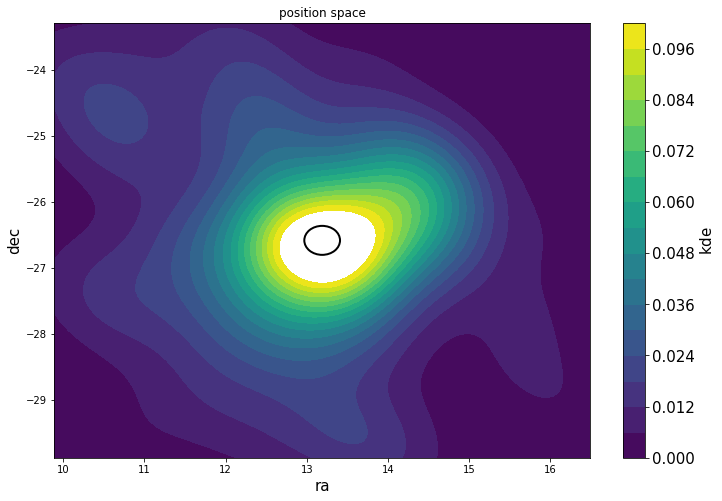

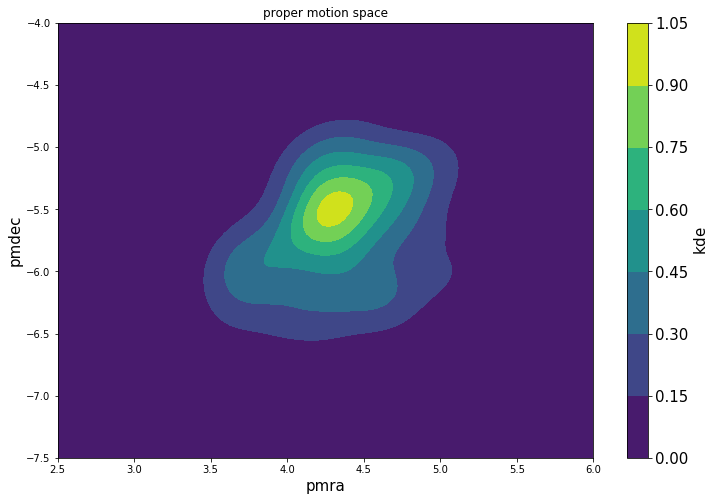

In [87]:
clust_indx = (np.sqrt((np.fabs(ra_DB.as_matrix()-coord_ra_dec.ra.deg)**2+np.fabs(dec_DB.as_matrix()-coord_ra_dec.dec.deg)**2))
              >GlobClust_Log_r_t[0]/60)

pmra_kde=pmra_DB[clust_indx].as_matrix()
pmdec_kde=pmdec_DB[clust_indx].as_matrix()
print(shape(pmdec_kde))
#pmra_kde=pmra_DB.as_matrix()
#pmdec_kde=pmdec_DB.as_matrix()

ra_kde=ra_DB[clust_indx].as_matrix()
dec_kde=dec_DB[clust_indx].as_matrix()
print(shape(pmdec_kde))

pmra_kde_1 = 0-10 
pmra_kde_2 = 0+10
pmdec_kde_1 = 0-10
pmdec_kde_2 = 0+10


findx=(np.isfinite(pmra_kde))*(np.isfinite(pmdec_kde))*(pmra_kde<pmra_kde_2)*(pmra_kde>pmra_kde_1)*(pmdec_kde>pmdec_kde_1)*(pmdec_kde<pmdec_kde_2)

from scipy import stats
from matplotlib import colors, ticker, cm

#pmra_kde=pmra_DB.as_matrix()[findx]
#pmdec_kde=pmdec_DB.as_matrix()[findx]

#pmra_kde=pmra_DB.dropna().as_matrix()
#pmdec_kde=pmdec_DB.dropna().as_matrix()

r_t = GlobClust_Log_r_t.as_matrix()
r_t = r_t[0]

ra_kde_1 = coord_ra_dec.ra.deg-r_t/60*15
ra_kde_2 = coord_ra_dec.ra.deg+r_t/60*15
dec_kde_1 = coord_ra_dec.dec.deg-r_t/60*15
dec_kde_2 = coord_ra_dec.dec.deg+r_t/60*15

#KDE part
k = stats.gaussian_kde([ra_kde[findx], dec_kde[findx]], )
xi, yi = np.mgrid[ra_kde_1:ra_kde_2:100*1j, 
                  dec_kde_1:dec_kde_2:100*1j]
#print(xi,yi,k)
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
zii=zi.reshape(xi.shape)

contours = np.arange(0,0.106, 0.006)
print(contours)

fig=plt.figure(figsize=(12,8))
plt.contourf(xi, yi, zii , levels=contours)# locator=ticker.LogLocator())
circle2 = plt.Circle((coord_ra_dec.ra.deg, coord_ra_dec.dec.deg), GlobClust_Log_r_t[0]/60, color='k', fill=False, lw=2)
plt.gca().add_artist(circle2)
plt.title('position space')
plt.xlabel('ra', fontsize=15)
plt.ylabel('dec', fontsize=15)
cb=plt.colorbar()
cb.ax.tick_params(labelsize=15)
cb.set_label(r'$\mathrm{kde}$',fontsize=15)
#plt.gca().set_xlim([])

#KDE part
k = stats.gaussian_kde([pmra_kde[findx], pmdec_kde[findx]], )
#xi, yi = np.mgrid[pmra_kde_1:pmra_kde_2:100*1j, 
#                  pmdec_kde_1:pmdec_kde_2:100*1j]
xi, yi = np.mgrid[2.5:6:100*1j, 
                  -7.5:-4:100*1j]
#print(xi,yi,k)
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
zii=zi.reshape(xi.shape)

fig=plt.figure(figsize=(12,8))
plt.contourf(xi, yi, zii ,)# locator=ticker.LogLocator())
plt.title('proper motion space')
plt.xlabel('pmra', fontsize=15)
plt.ylabel('pmdec', fontsize=15)
cb=plt.colorbar()
cb.ax.tick_params(labelsize=15)
cb.set_label(r'$\mathrm{kde}$',fontsize=15)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log10
  # Remove the CWD from sys.path while we load stuff.



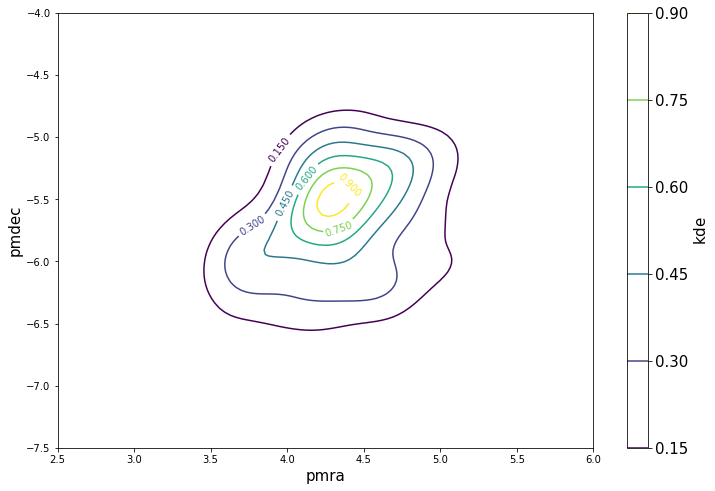

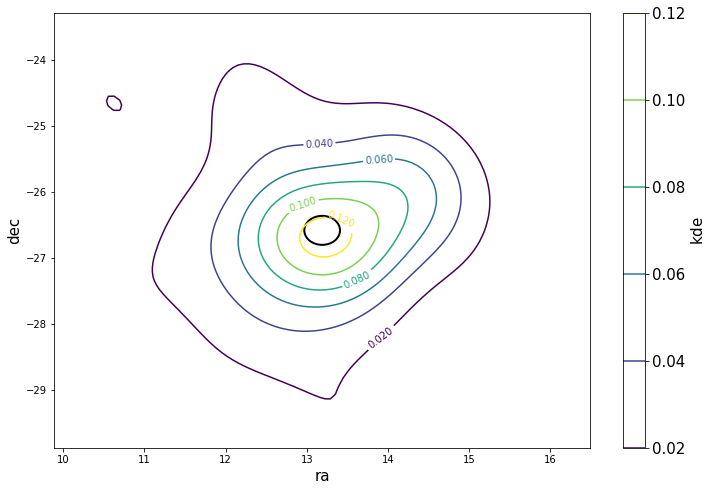

In [88]:
r_t = GlobClust_Log_r_t.as_matrix()
r_t = r_t[0]

#ra_kde_1 = 0-r_t/60*15
#ra_kde_2 = 0+r_t/60*15
#dec_kde_1 = 0-r_t/60*15
#dec_kde_2 = 0+r_t/60*15

lev_exp = np.arange(np.floor(np.log10(pmra_DB_norm[~numpy.isnan(pmra_DB_norm)]).min()-1),
                    np.ceil(np.log10(pmra_DB_norm[~numpy.isnan(pmra_DB_norm)]).max()+1))
levs = np.power(10, lev_exp)

#KDE part
k = stats.gaussian_kde([pmra_kde[findx], pmdec_kde[findx]], )
xi, yi = np.mgrid[2.5:6:100*1j, 
                  -7.5:-4:100*1j]
#print(xi,yi,k)
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
zii=zi.reshape(xi.shape)

fig=plt.figure(figsize=(12,8))
CS=plt.contour(xi, yi, zii, )# levs, norm=colors.LogNorm())#locator=ticker.LogLocator())
plt.xlabel('pmra', fontsize=15)
plt.ylabel('pmdec', fontsize=15)
plt.clabel(CS, inline=1, fontsize=10, )
cb=plt.colorbar()
cb.ax.tick_params(labelsize=15)
cb.set_label(r'$\mathrm{kde}$',fontsize=15)

#KDE part
k = stats.gaussian_kde([ra_kde[findx], dec_kde[findx]], )
xi, yi = np.mgrid[ra_kde_1:ra_kde_2:100*1j, 
                  dec_kde_1:dec_kde_2:100*1j]
#print(xi,yi,k)
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
zii=zi.reshape(xi.shape)

fig=plt.figure(figsize=(12,8))
CS=plt.contour(xi, yi, zii )#, levs, norm=colors.LogNorm())#locator=ticker.LogLocator())
circle2 = plt.Circle((coord_ra_dec.ra.deg, coord_ra_dec.dec.deg), GlobClust_Log_r_t[0]/60, color='k', fill=False, lw=2)
plt.gca().add_artist(circle2)
plt.xlabel('ra', fontsize=15)
plt.ylabel('dec', fontsize=15)
plt.clabel(CS, inline=1, fontsize=10, )
cb=plt.colorbar()
cb.ax.tick_params(labelsize=15)
cb.set_label(r'$\mathrm{kde}$',fontsize=15)

pmra_DB: (1035, 1) 
 pmra norm a: (1035, 1)

 GC_pmradec_a 1: (128, 32)
GC_pmradec: (1035, 2)

 GC_pmradec_a 2: (128, 32)
(128,)
(73,)
(73,)
(73,)
(73,)


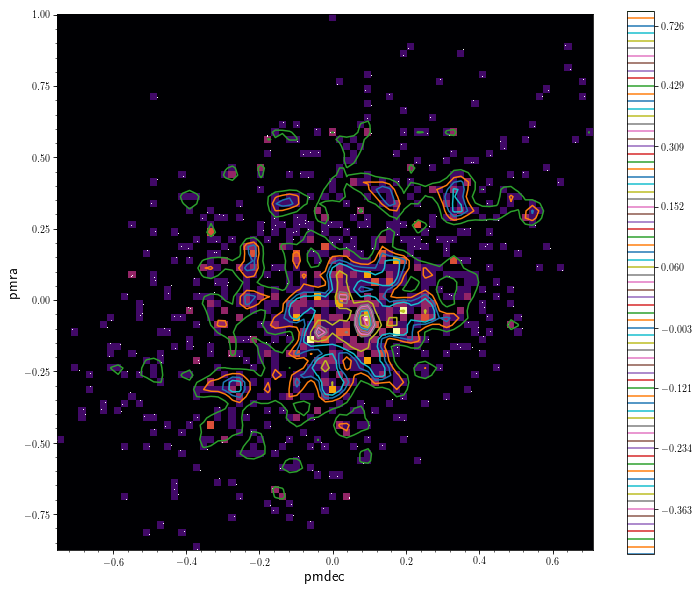

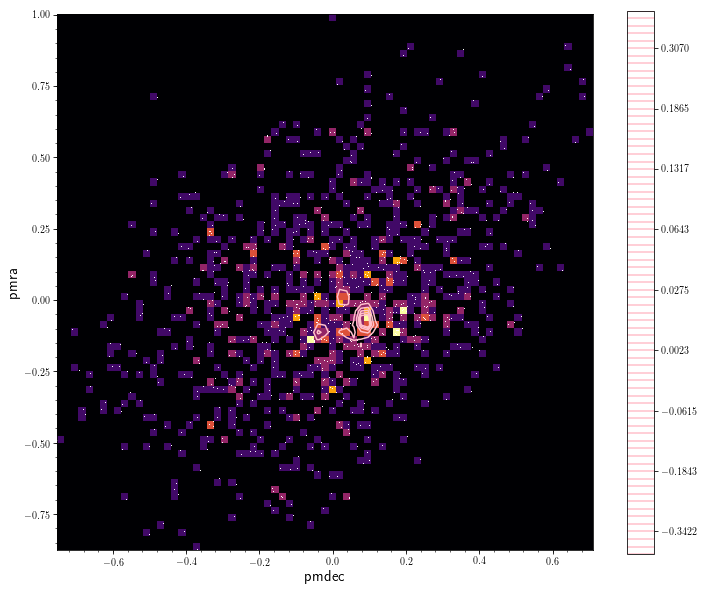

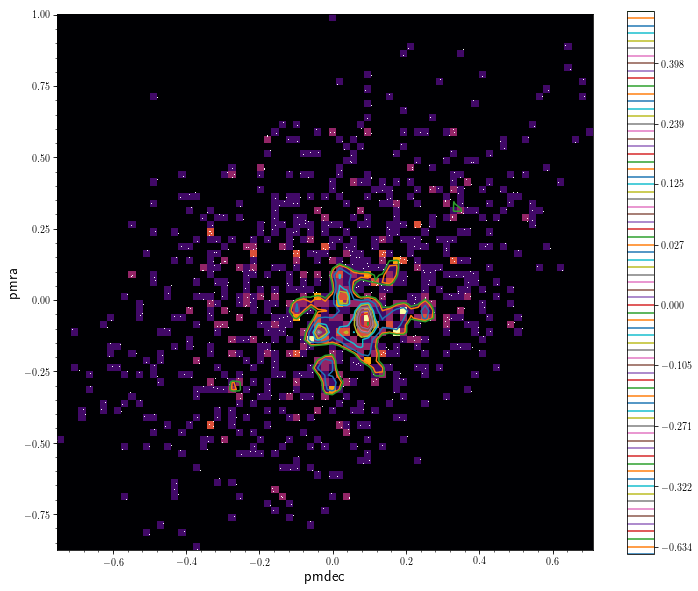

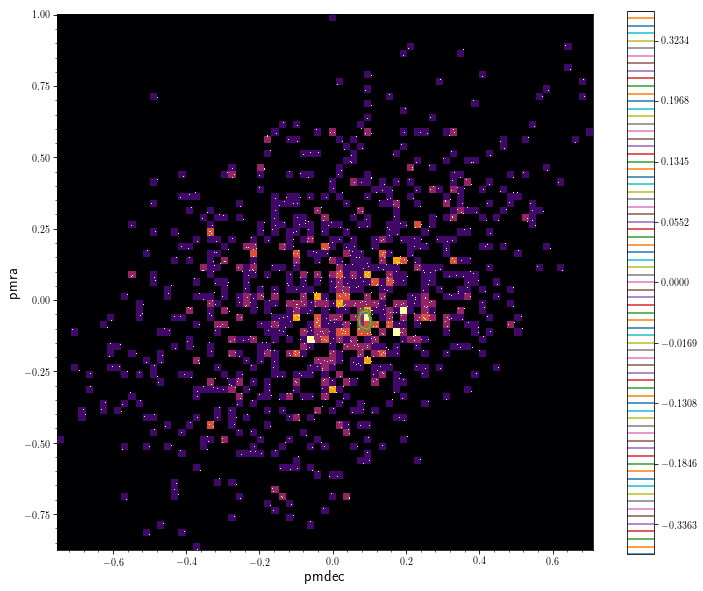

In [25]:
# Wavelet Transform plots for all 4 coefficients
# plots in proper motions

import pywt

pmra_DB_norm_a = (pmra_DB-pmra_DB.mean())#.as_matrix()#/(pmra_DB.mean())
pmdec_DB_norm_a = (pmdec_DB-pmdec_DB.mean())#.as_matrix()#/(pmra_DB.mean())

print('pmra_DB:',shape(pmra_DB), '\n pmra norm a:', shape(pmra_DB_norm_a))


GC_pmradec=pmra_DB_norm_a.join(pmdec_DB_norm_a)
GC_pmra = pmra_DB_norm_a
GC_pmdec = pmdec_DB_norm_a
GC_pmradec_a = GC_pmradec.as_matrix()

#GC_pmradec_a = reshape(GC_pmradec.as_matrix(), (220,32))
#GC_pmradec_a = pad(GC_pmradec_a, [(4, 0), (0, 0)], 'mean')
GC_pmradec_a = pad(GC_pmradec_a, [(5, 0), (0, 0)], 'mean')
GC_pmradec_a = reshape(GC_pmradec_a, (65,32))
GC_pmradec_a = pad(GC_pmradec_a, [(63, 0), (0, 0)], 'mean')
#GC_pmradec_a = pad(GC_pmradec, [(1385, 0), (0, 0)], 'mean')
print('\n GC_pmradec_a 1:',shape(GC_pmradec_a))
#GC_pmradec_a = reshape(GC_pmradec_a, (256,32))
#GC_pmradec_a = reshape(GC_pmradec_a, (512,16))
#GC_pmradec_a = pad(GC_pmradec, [(1385, 0), (0, 0)], 'mean')
print('GC_pmradec:',shape(GC_pmradec))
print('\n GC_pmradec_a 2:',shape(GC_pmradec_a))

WT2 = pywt.swtn(GC_pmradec_a, 'db4', level=1, start_level=0)
WT2

WT2_aa=WT2[0].get("aa")[:,0]
WT2_aa=WT2_aa[~numpy.isnan(WT2_aa)]
WT2_aa.sort()
print(shape(WT2_aa))

WT2_ad=WT2[0].get("ad")[:,0]
WT2_ad=WT2_ad[~numpy.isnan(WT2_ad)]
WT2_ad.sort()
#print(WT2_ad)

WT2_da=WT2[0].get("da")[:,0]
WT2_da=WT2_da[~numpy.isnan(WT2_da)]
WT2_da.sort()
#print(WT2_da)

WT2_dd=WT2[0].get("dd")[:,0]
WT2_dd=WT2_dd[~numpy.isnan(WT2_dd)]
WT2_dd.sort()
#print(WT2_dd)

colours = arange(0.1,len(WT2_aa)+1,0.1)
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

WT_plus_aa = (np.diff(WT2_aa) != 0)#*(np.diff(WT2_aa)<0)
WT_plus_aa=np.append(WT_plus_aa, True)
print(shape(WT2_aa[WT_plus_aa]))
WT2_aa = WT2_aa[WT_plus_aa]
WT2_aa.sort()

WT_plus_ad = (np.diff(WT2_ad) != 0)#*(np.diff(WT2_aa)<0)
WT_plus_ad=np.append(WT_plus_ad, True)
print(shape(WT2_ad[WT_plus_ad]))
WT2_ad = WT2_ad[WT_plus_ad]
WT2_ad.sort()

WT_plus_da = (np.diff(WT2_da) != 0)#*(np.diff(WT2_aa)<0)
WT_plus_da=np.append(WT_plus_da, True)
print(shape(WT2_da[WT_plus_da]))
WT2_da = WT2_da[WT_plus_da]
WT2_da.sort()

WT_plus_dd = (np.diff(WT2_dd) != 0)#*(np.diff(WT2_aa)<0)
WT_plus_dd=np.append(WT_plus_dd, True)
print(shape(WT2_dd[WT_plus_dd]))
WT2_dd = WT2_dd[WT_plus_dd]
WT2_dd.sort()

fig=figure()
bovy_plot.bovy_print(fig_width=12, fig_height=10, )#axes_labelsize=16, text_fontsize=11, legend_fontsize=12, xtick_labelsize=10, ytick_labelsize=10, xtick_minor_size=2, ytick_minor_size=2, xtick_major_size=4, ytick_major_size=4)

# Proper Motion Space
bovy_plot.scatterplot(GC_pmradec["pmdec"].dropna().as_matrix(), GC_pmradec["pmra"].dropna().as_matrix(), 'w,',
                      cmap='inferno', cntrcolors=colors, levels=WT2_aa, bins=75, cntrSmooth=True)
cb=plt.colorbar()
plt.ylabel('pmra', fontsize=15)
plt.xlabel('pmdec', fontsize=15)

bovy_plot.scatterplot(GC_pmradec["pmdec"].dropna().as_matrix(), GC_pmradec["pmra"].dropna().as_matrix(), 'w,',
                      cmap='inferno', cntrcolors=['pink'], levels=WT2_ad, bins=75, cntrSmooth=True)
cb=plt.colorbar()
plt.ylabel('pmra', fontsize=15)
plt.xlabel('pmdec', fontsize=15)

bovy_plot.scatterplot(GC_pmradec["pmdec"].dropna().as_matrix(), GC_pmradec["pmra"].dropna().as_matrix(), 'w,',
                      cmap='inferno', cntrcolors=colors, levels=WT2_da, bins=75, cntrSmooth=True)
cb=plt.colorbar()
plt.ylabel('pmra', fontsize=15)
plt.xlabel('pmdec', fontsize=15)

bovy_plot.scatterplot(GC_pmradec["pmdec"].dropna().as_matrix(), GC_pmradec["pmra"].dropna().as_matrix(), 'w,',
                      cmap='inferno', cntrcolors=colors, levels=WT2_dd, bins=75, cntrSmooth=True)

cb=plt.colorbar()
plt.ylabel('pmra', fontsize=15)
plt.xlabel('pmdec', fontsize=15)


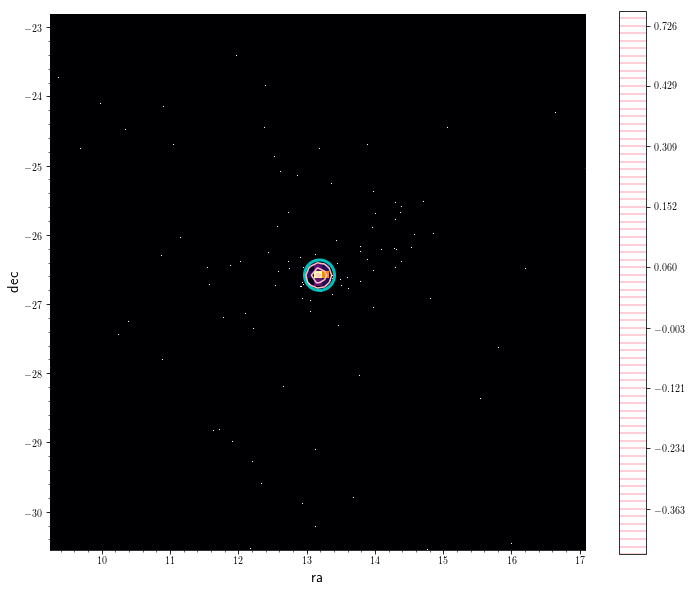

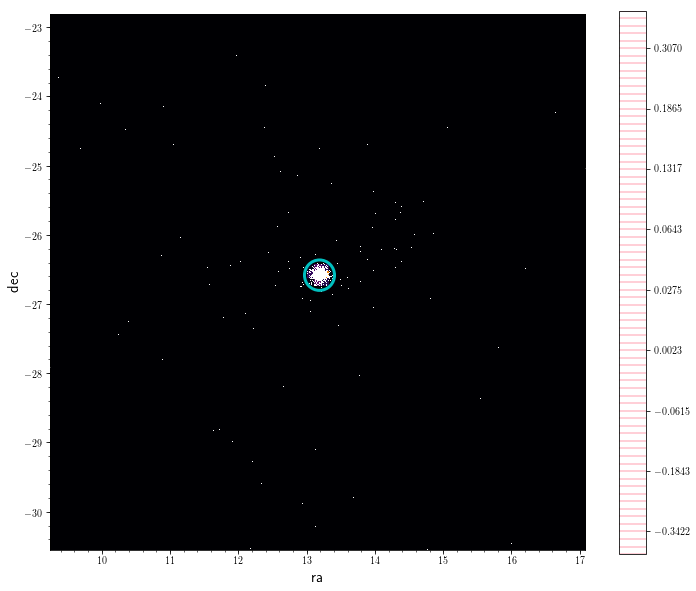

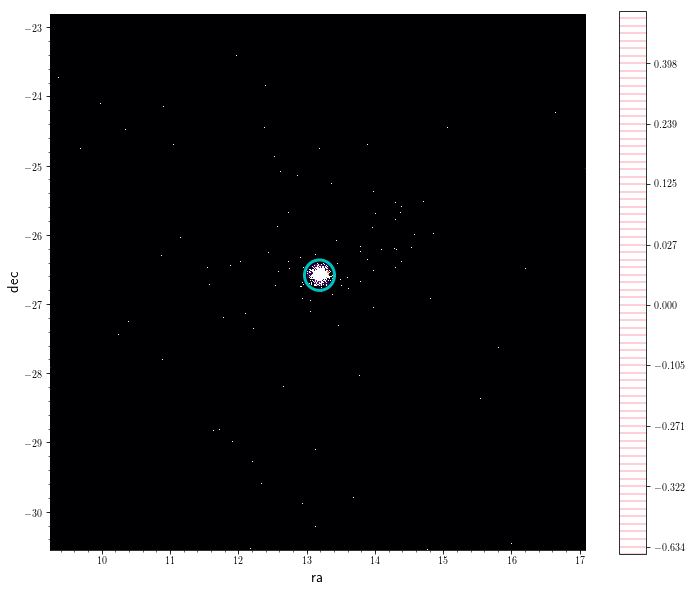

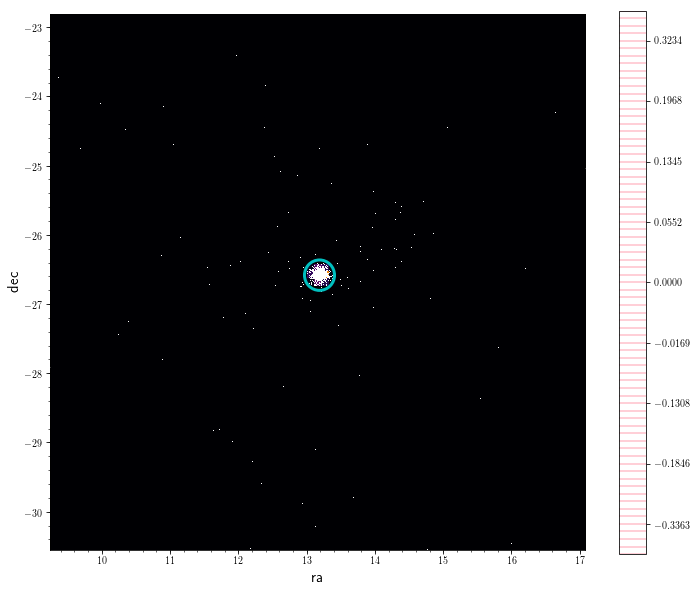

In [24]:
#Position Sapce
GC_radec=ra_DB.join(dec_DB)
fig=figure()
bovy_plot.bovy_print(fig_width=12, fig_height=10, )
bovy_plot.scatterplot(GC_radec["ra"].dropna().as_matrix(), GC_radec["dec"].dropna().as_matrix(), 'w,',
                      cmap='inferno', cntrcolors=['pink'], levels=WT2_aa, bins=75, cntrSmooth=True, gcf=True)
ax = plt.gca()
circle2 = plt.Circle((coord_ra_dec.ra.deg, coord_ra_dec.dec.deg), GlobClust_Log_r_t[0]/60, color='c', fill=False, lw=3)
ax.add_artist(circle2)
cb=plt.colorbar()
plt.xlabel('ra', fontsize=15)
plt.ylabel('dec', fontsize=15)

fig=figure()
bovy_plot.bovy_print(fig_width=12, fig_height=10, )
bovy_plot.scatterplot(GC_radec["ra"].dropna().as_matrix(), GC_radec["dec"].dropna().as_matrix(), 'w,',
                      cmap='inferno', cntrcolors=['pink'], levels=WT2_ad, bins=75, cntrSmooth=True, gcf=True)
ax = plt.gca()
circle2 = plt.Circle((coord_ra_dec.ra.deg, coord_ra_dec.dec.deg), GlobClust_Log_r_t[0]/60, color='c', fill=False, lw=3)
ax.add_artist(circle2)
cb=plt.colorbar()
plt.xlabel('ra', fontsize=15)
plt.ylabel('dec', fontsize=15)

fig=figure()
bovy_plot.bovy_print(fig_width=12, fig_height=10, )
bovy_plot.scatterplot(GC_radec["ra"].dropna().as_matrix(), GC_radec["dec"].dropna().as_matrix(), 'w,',
                      cmap='inferno', cntrcolors=['pink'], levels=WT2_da, bins=75, cntrSmooth=True, gcf=True)
ax = plt.gca()
circle2 = plt.Circle((coord_ra_dec.ra.deg, coord_ra_dec.dec.deg), GlobClust_Log_r_t[0]/60, color='c', fill=False, lw=3)
ax.add_artist(circle2)
cb=plt.colorbar()
plt.xlabel('ra', fontsize=15)
plt.ylabel('dec', fontsize=15)

fig=figure()
bovy_plot.bovy_print(fig_width=12, fig_height=10, )
bovy_plot.scatterplot(GC_radec["ra"].dropna().as_matrix(), GC_radec["dec"].dropna().as_matrix(), 'w,',
                      cmap='inferno', cntrcolors=['pink'], levels=WT2_dd, bins=75, cntrSmooth=True, gcf=True)#, zorder = 0)
ax = plt.gca()
circle2 = plt.Circle((coord_ra_dec.ra.deg, coord_ra_dec.dec.deg), GlobClust_Log_r_t[0]/60, color='c', fill=False, lw=3)#, zorder=2)
ax.add_artist(circle2)

cb=plt.colorbar()
plt.xlabel('ra', fontsize=15)
plt.ylabel('dec', fontsize=15)

plt.show()

In [45]:
type(ra_DB)

#rpbp_DB[indx2]
#M_DB[indx2]
np.sum(indx2)
indx2

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

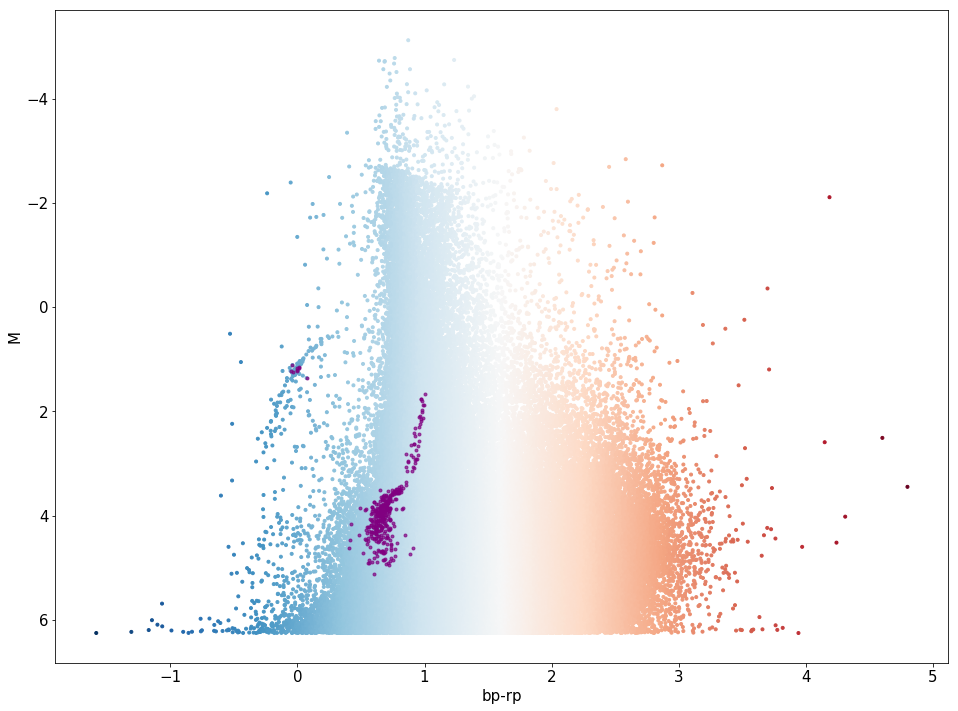

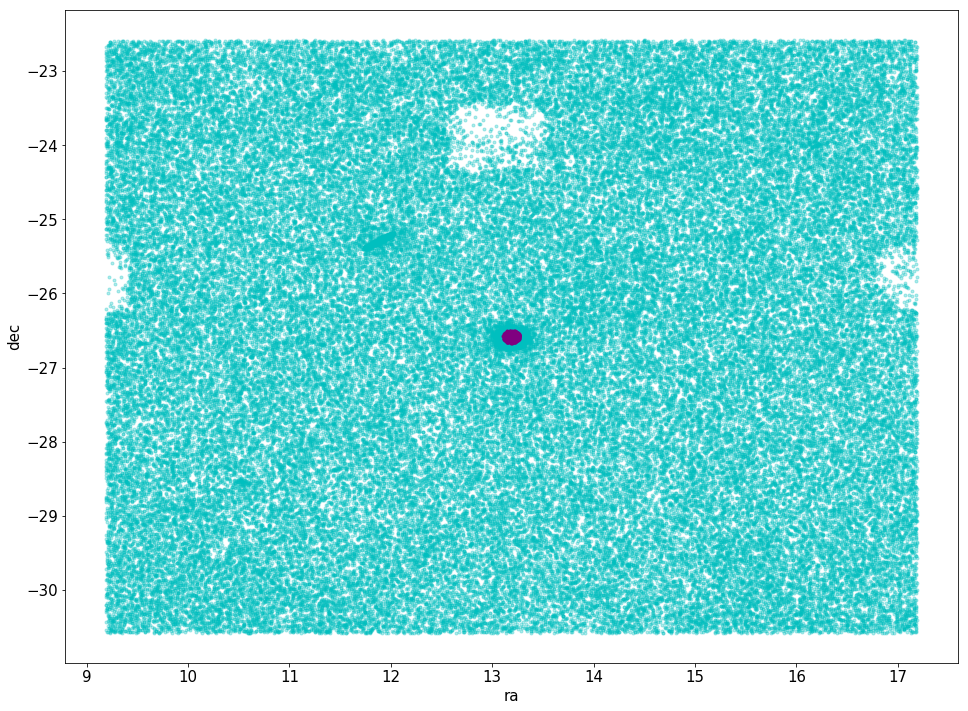

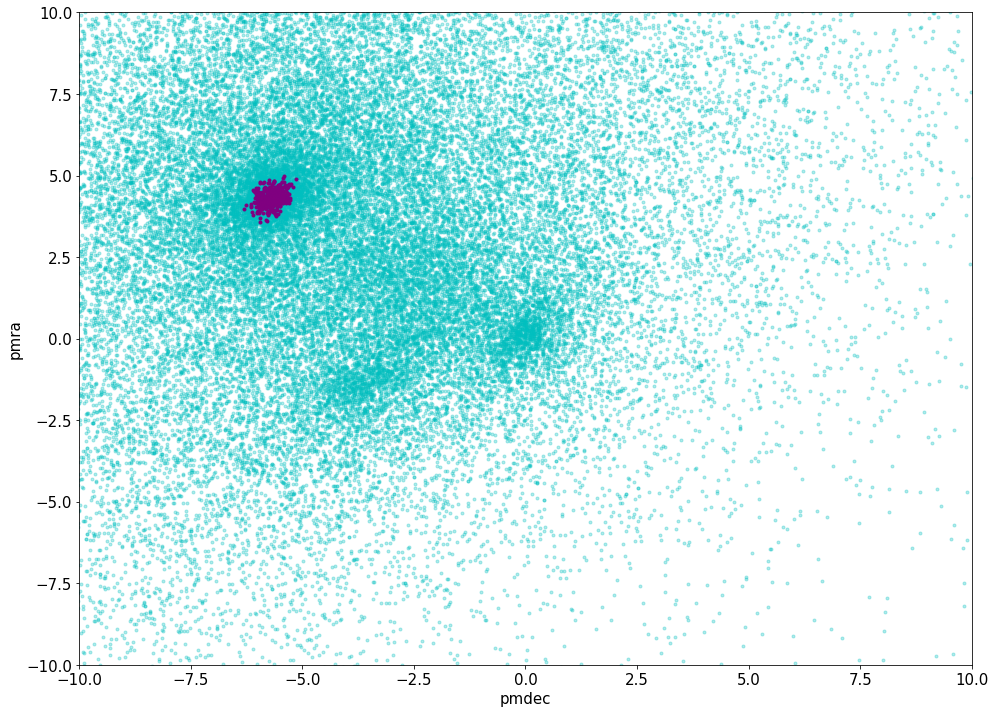

In [25]:
indx2 = (np.sqrt((np.fabs(GlobClust_Log_ra.as_matrix()-coord_ra_dec.ra.deg)**2+\
                  np.fabs(GlobClust_Log_dec.as_matrix()-coord_ra_dec.dec.deg)**2))<5/60)

GC_ra2 = GlobClust_Log_ra[indx2]
GC_dec2 = GlobClust_Log_dec[indx2]
ra_DB2 = GC_ra2.reindex(x_out3.index)
dec_DB2 = GC_dec2.reindex(y_out3.index)

GC_rpbp2 = GlobClust_Log_rpbp[indx2]
GC_M2 = GlobClust_Log_M[indx2]
rpbp_DB2 = GC_rpbp2.reindex(x_out3.index)
M_DB2 = GC_M2.reindex(y_out3.index)

GC_pmra2 = GlobClust_Log_pmra[indx2]
GC_pmdec2 = GlobClust_Log_pmdec[indx2]
pmra_DB2 = GC_pmra2.reindex(x_out3.index)
pmdec_DB2 = GC_pmdec2.reindex(y_out3.index)

#rpbp_DB_pd = rpbp_DB[indx2]
#M_DB_pd = M_DB[indx2]
#ra_DB_pd = ra_DB[indx2]
#dec_DB_pd = dec_DB[indx2]
#pmra_DB_pd = pmra_DB[indx2]
#pmdec_DB_pd = pmdec_DB[indx2]

fig=plt.figure(figsize=(16,12))
plt.scatter(x=GlobClust_Log_rpbp, y=GlobClust_Log_M, c=GlobClust_Log_rpbp, cmap='RdBu_r', marker='.')
#plt.scatter(x=GlobClust_Log_rpbp[indx2], y=GlobClust_Log_M[indx2], c='purple', marker='.')
plt.scatter(x=rpbp_DB2, y=M_DB2, c='purple', alpha=0.7, marker='.')
#plt.scatter(x=rpbp_ic, y=M_ic, c='g', alpha=0.2, marker='.')
plt.xlabel('bp-rp', fontsize=15)
plt.ylabel('M', fontsize=15)
plt.gca().invert_yaxis()
#plt.title('CMD of ' + GC_IDs[i], fontsize=15)
#cb=plt.colorbar()
#cb.ax.tick_params(labelsize=15)
#cb.set_label(r'$\mathrm{pmdec}$',fontsize=15)
plt.gca().tick_params(labelsize=15)
plt.show()

fig=plt.figure(figsize=(16,12))
plt.scatter(x=GlobClust_Log_ra_out, y=GlobClust_Log_dec_out, c='c', alpha=0.3, marker='.')
#plt.scatter(x=GlobClust_Log_ra_out[indx2], y=GlobClust_Log_dec_out[indx2], c='purple', alpha=0.3, marker='.')
#plt.scatter(x=rpbp_final2, y=M_final2, c='purple', alpha=0.7)
plt.scatter(x=ra_DB2, y=dec_DB2, c='purple', marker='.')#, alpha=0.2)
plt.xlabel('ra', fontsize=15)
plt.ylabel('dec', fontsize=15)
#plt.gca().invert_yaxis()
#plt.title('CMD of ' + GC_IDs[i], fontsize=15)
#cb=plt.colorbar()
#cb.ax.tick_params(labelsize=15)
#cb.set_label(r'$\mathrm{pmdec}$',fontsize=15)
plt.gca().tick_params(labelsize=15)
plt.show()

fig=plt.figure(figsize=(16,12))
#plt.hexbin(GlobClust_Log_pmdec_out, GlobClust_Log_pmra_out, extent=[-10,10, -10,10], bins='log',gridsize=200)
plt.scatter(x=GlobClust_Log_pmdec_out[parallax_indx], y=GlobClust_Log_pmra_out[parallax_indx], c='c', alpha=0.3, marker='.')
#plt.scatter(x=GlobClust_Log_pmdec_out[parallax_indx][indx2], y=GlobClust_Log_pmra_out[parallax_indx][indx2], c='purple', alpha=0.3, marker='.')
#plt.scatter(x=rpbp_final2, y=M_final2, c='purple', alpha=0.7)
plt.scatter(x=pmdec_DB2, y=pmra_DB2, c='purple', marker='.')#, alpha=0.2)
plt.ylabel('pmra', fontsize=15)
plt.xlabel('pmdec', fontsize=15)
#plt.gca().invert_yaxis()
#plt.title('CMD of ' + GC_IDs[i], fontsize=15)
#cb=plt.colorbar()
#cb.ax.tick_params(labelsize=15)
#cb.set_label(r'$\mathrm{pmdec}$',fontsize=15)
plt.gca().tick_params(labelsize=15)
plt.gca().set_ylim([-10, 10])
plt.gca().set_xlim([-10,10])
plt.show()